# Python - Pandas  

[Pandas Reference](http://pandas.pydata.org/pandas-docs/stable/reference/index.html)

## Series and DataFrames

In [1]:
import numpy as np
import pandas as pd

- Series

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

- DataFrames # Very similar to R dataframes

In [3]:
import pandas as pd
dates = pd.date_range('20130101', periods=6) 
# R + lubridate:  dates <- ymd("2013-01-01")+days(0:5)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
# R + tidyverse: 
# m <- matrix(rnorm(6*4), ncol = 4)
# colnames(m) <- c("A", "B", "C", "D")
# df <- as_tibble(m) %>% mutate(dates)
df

,A,B,C,D
2013-01-01,1.588871,0.432520,-0.350392,0.811976
2013-01-02,-0.148908,-1.209078,0.119085,0.523345
2013-01-03,0.894992,0.053553,0.567586,0.712589
2013-01-04,0.510595,-0.409690,-0.763129,0.334096
2013-01-05,0.714882,-0.368995,-0.816042,-0.451742
2013-01-06,-1.375754,1.128288,0.903103,-1.350488


## Pandas vs. R

In [5]:
df.shape # R: dim(df)

(6, 4)

In [6]:
df.head(3) # R: head(df, 3)

,A,B,C,D
2013-01-01,1.588871,0.432520,-0.350392,0.811976
2013-01-02,-0.148908,-1.209078,0.119085,0.523345
2013-01-03,0.894992,0.053553,0.567586,0.712589


In [7]:
df.mean()
# R + tidyverse: df %>% select_if(is.numeric) %>% map_dbl(mean, na.rm = TRUE)

A    0.364113
B   -0.062234
C   -0.056632
D    0.096629
dtype: float64

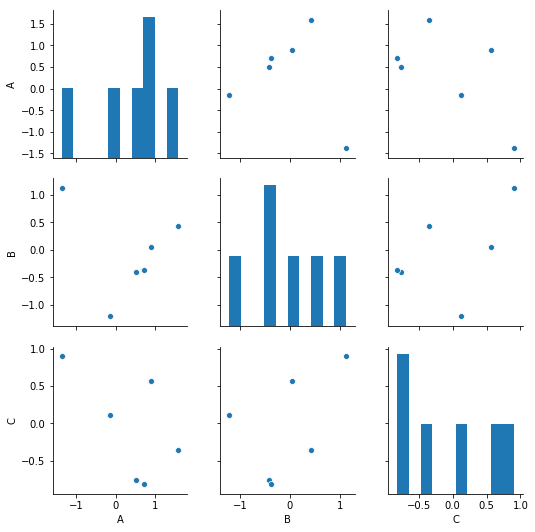

In [8]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df[["A", "B", "C"]])
plt.show()
# R + GGally: df %>% select(A, B, C) %>% ggpairs()

## Pandas vs. Tidyr

| **pandas** | **tidyr** |
| :---: | :---: |
| melt |	gather |
| pivot |	spread |

## Pandas vs. Dplyr
| **pandas** | **dplyr** |
| :---: | :---: |
| assign |	mutate |
| filter |	select |
| rename |	rename |
| query |	filter |
| sort_values |	arrange |
| groupby |	group_by |
| agg |	summarize


## Panda read data from Kaggle by using Kaggle's API
[GitHub reference](https://github.com/kaggle/kaggle-api)

It is required the package `kaggle`
        #%%bash
        pip install kaggle --upgrade

Then it is required to **'Create API Token'** from the 
Kraggle Account.

This will trigger the download of `kaggle.json`, 
a file containing your API credentials. 

Place this file in the location `~/.kaggle/kaggle.json`

In [37]:
import kaggle
import pandas as pd
kaggle.api.authenticate()
kaggle.api.dataset_download_files('toramky/automobile-dataset', unzip=True)
car_data = pd.read_csv("Automobile_data.csv")

## Panda read data from url 

In [38]:
import pandas as pd
df=pd.read_csv("https://corgis-edu.github.io/corgis/datasets/csv/cars/cars.csv")

we start by visualizing the variables, the number of observations and some of them

In [39]:
from IPython.core.display import display, HTML

# print(df.columns)
display(HTML('<div>Number of observation: <font style="color: blue;">%d</span></font>' % len(df)))
df.head(2)

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207


In [40]:
df['Identification.Model Year'].unique()[:5]

array(['2009 Audi A3', '2009 Audi A5', '2009 Audi Q7',
       '2009 Audi A4 Sedan', '2012 Acura TL'], dtype=object)

Let us define a function to extract the _car model_ from the column `Identification.Model Year`

In [42]:
def reduce_model_year(my,y):
    return my.replace(str(y),'');

The we use the `DataFrame` method `apply` to crate the new column `model`

In [44]:
if 'model' in df.columns:       # if the column `model` has been created before
    df.drop('model', axis=1)    # drop it
df['model'] = df.apply(lambda x: reduce_model_year(x['Identification.Model Year'], x['Identification.Year']), axis=1)
df.filter(items=['Identification.Model Year', 'model']).head(3)

,Identification.Model Year,model
0,2009 Audi A3,Audi A3
1,2009 Audi A3,Audi A3
2,2009 Audi A3,Audi A3


An alternative way to make this would be by using the `assign` method together with the `numpy.vectorize`
function that is used to vectoring the function `reduce_model_year`

In [45]:
import numpy as np
if 'model' in df.columns:       # if the column `model` has been created before
    df.drop('model', axis=1)    # drop it
df = df.assign(model=lambda x: np.vectorize(reduce_model_year)(x['Identification.Model Year'], x['Identification.Year']), axis=1)
df[['Identification.Model Year', 'model']].head(3) # other way to make a filter

,Identification.Model Year,model
0,2009 Audi A3,Audi A3
1,2009 Audi A3,Audi A3
2,2009 Audi A3,Audi A3


Let us count the number of lines containing `NaNs`value

In [46]:
len(df) - df.count()

Dimensions.Height                                  0
Dimensions.Length                                  0
Dimensions.Width                                   0
Engine Information.Driveline                       0
Engine Information.Engine Type                     0
Engine Information.Hybrid                          0
Engine Information.Number of Forward Gears         0
Engine Information.Transmission                    0
Fuel Information.City mpg                          0
Fuel Information.Fuel Type                         0
Fuel Information.Highway mpg                       0
Identification.Classification                      0
Identification.ID                                  0
Identification.Make                                0
Identification.Model Year                          0
Identification.Year                                0
Engine Information.Engine Statistics.Horsepower    0
Engine Information.Engine Statistics.Torque        0
model                                         

### Using Group-by’s and Merges

In [47]:
group_by_model = df.groupby(by= df['model'])

In [49]:
df_count = (group_by_model 
 .agg({'Identification.ID':'count', 'Identification.Model Year':'first'})
 .rename(columns={'Identification.ID':'Count'}))
df_count.head()

,Count,Identification.Model Year
model,,
Volkswagen Routan,4,2010 Volkswagen Routan
Acura MDX,3,2010 Acura MDX
Acura RDX,4,2010 Acura RDX
Acura RL,3,2010 Acura RL
Acura TL,8,2012 Acura TL


In [50]:
df_mean = group_by_model.mean()
df_mean.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque,axis
model,,,,,,,,,,,
Volkswagen Routan,214.0,19.0,161.00,True,6.000000,16.500000,24.000000,2010.000,224.000,244.500,1.0
Acura MDX,197.0,3.0,202.00,True,6.000000,16.000000,21.000000,2011.000,300.000,270.000,1.0
Acura RDX,119.0,27.0,78.00,True,5.000000,18.000000,23.000000,2010.500,240.000,260.000,1.0
Acura RL,175.0,109.0,55.00,True,5.666667,16.666667,23.333333,2011.000,300.000,271.000,1.0
Acura TL,172.0,91.5,87.75,True,5.500000,17.750000,25.875000,2010.875,295.625,265.875,1.0


In [51]:
df_merge = df_mean.merge(df_count, left_index=True, right_index=True, suffixes=['_avg','_count'])

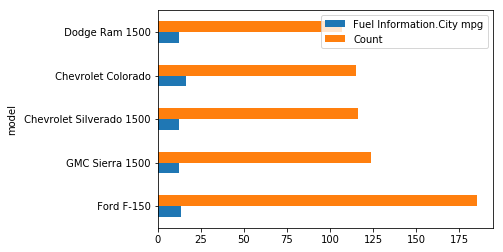

In [52]:
df_merge[['Fuel Information.City mpg', 'Count']].sort_values(by=['Count','Fuel Information.City mpg'], ascending=False).head(5).plot(kind='barh')